<a href="https://colab.research.google.com/github/pillaiharish/challenges/blob/master/imageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!git init

Initialized empty Git repository in /content/.git/


It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.


* 0: T-shirt/top
* 1: Trouser
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot



In [0]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
! git clone https://github.com/zalandoresearch/fashion-mnist
! git pull

Cloning into 'fashion-mnist'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 688 (delta 2), reused 1 (delta 0), pack-reused 681
Receiving objects: 100% (688/688), 105.21 MiB | 9.53 MiB/s, done.
Resolving deltas: 100% (395/395), done.
fatal: not a git repository (or any of the parent directories): .git


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials =  GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download=drive.CreateFile({'id': '13oanYRoH45gq02baZ1ikf9DyXhdL5tig'})

In [0]:
download.GetContentFile('train-images-idx3-ubyte.gz')

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('/content/fashion-mnist/data/fashion')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/fashion-mnist/data/fashion/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /content/fashion-mnist/data/fashion/train-labels-idx1-ubyte.gz
Extracting /content/fashion-mnist/data/fashion/t10k-images-idx3-ubyte.gz
Extracting /content/fashion-mnist/data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
data = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')

Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 26421880 bytes.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 29515 bytes.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 4422102 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 5148 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [0]:
! ls

adc.json  data	fashion-mnist  sample_data  train-images-idx3-ubyte.gz


In [0]:
! ls

adc.json  data	fashion-mnist  sample_data  train-images-idx3-ubyte.gz


In [0]:
import gzip
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

expected = file_content[3:]
# print(expected)

In [0]:

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    print(labels_path)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)
    print(images_path)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
a,b=load_mnist('/content/fashion-mnist/data/fashion')
temp=a[1,:]
temp.resize(28,28)
temp.shape
# a.shape

/content/fashion-mnist/data/fashion/train-labels-idx1-ubyte.gz
/content/fashion-mnist/data/fashion/train-images-idx3-ubyte.gz


(28, 28)

As earlier in temp 1st data is loaded we need to verify the label class of 1st data i.e in b

In [0]:
b[1]

0

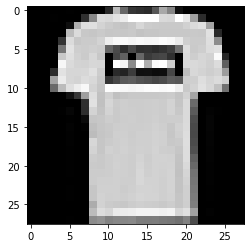

In [0]:
import matplotlib.pyplot as plt
plt.imshow(temp,cmap=plt.cm.gray)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm


Using TensorFlow backend.


In [0]:
train_image=[]
# for i in tqdm(range(train.shape)):
a.shape

(60000, 784)

In [0]:
X=a

In [0]:
X=a.reshape(60000,28,28,1)
X

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


#### `to_categorical` converts this into a matrix with as many columns as there are classes. The number of rows stays the same. A binary matrix representation of the input. The classes axis is placed last.

In [0]:
y= to_categorical(b) 
type(y)

numpy.ndarray

In [0]:
y[1] # the product which is shirt has binary i.e: 1 in 0th position

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape= (28,28,1)))
model.add(Conv2D(64, (3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation= 'softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   


In [0]:
model.compile(loss= 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 25s 514us/step - loss: 14.0275 - acc: 0.1293 - val_loss: 12.9213 - val_acc: 0.1983
Epoch 2/10
48000/48000 [==============================] - 10s 217us/step - loss: 12.8821 - acc: 0.2004 - val_loss: 11.5459 - val_acc: 0.2837
Epoch 3/10
48000/48000 [==============================] - 11s 219us/step - loss: 11.4988 - acc: 0.2862 - val_loss: 10.0995 - val_acc: 0.3731
Epoch 4/10
48000/48000 [==============================] - 10s 217us/step - loss: 10.0547 - acc: 0.3759 - val_loss: 9.2053 - val_acc: 0.4288
Epoch 5/10
48000/48000 [==============================] - 10s 218us/step - loss: 9.4207 - acc: 0.4153 - val_loss: 9.0271 - val_acc: 0.4398
Epoch 6/10
48000/48000 [==============================] - 10s 216us/step - loss: 9.2440 - acc: 0.4264 - val_loss: 9.0163 - val_acc: 0.4406
Epoch 7

Our target now is to load test data

In [0]:
def load_mnist(path, kind='t10k'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    print(labels_path)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)
    print(images_path)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
a_test,b_test=load_mnist('/content/fashion-mnist/data/fashion')

/content/fashion-mnist/data/fashion/t10k-labels-idx1-ubyte.gz
/content/fashion-mnist/data/fashion/t10k-images-idx3-ubyte.gz


In [0]:
a_test.shape

(10000, 784)

In [0]:
prediction= model.predict_classes(a_test.reshape(10000,28,28,1))

In [0]:
prediction


array([9, 2, 3, ..., 0, 3, 2])

In [0]:
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_I5njJSF.csv

--2020-02-12 11:27:28--  https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_I5njJSF.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.66.52
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.66.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90010 (88K) [text/csv]
Saving to: ‘sample_submission_I5njJSF.csv’

sample_submission_I 100%[===================>]  87.90K  --.-KB/s    in 0.1s    

2020-02-12 11:27:28 (692 KB/s) - ‘sample_submission_I5njJSF.csv’ saved [90010/90010]



In [0]:
sample= pd.read_csv('/content/sample_submission_I5njJSF.csv')
sample['label']= prediction

In [0]:
sample.head(5)

,id,label
0,60001,9
1,60002,2
2,60003,3
3,60004,3
4,60005,2


In [0]:
sample.to_csv('sample.csv', header= True, index= False)